In [103]:
import numpy as np
import pandas as pd
import lightgbm


df=pd.read_csv('rankings.csv')
df=df.drop(["Unnamed: 0"], axis=1)
df.head()


,text,var0,var1,rankings
0,you are gay fucken retards,-3.657594,3.663636,0.0
1,YOU STUPID NIBOY (NEGRO),4.221009,-4.190837,1.0
2,This Ghirlor is a fucking moron,4.174453,-3.897739,3.0
3,Fraggle81 \nYou're a faggot.,4.140941,-4.010613,3.0
4,fuck you \n\nyou're a fag,4.195023,-3.975197,3.0


In [104]:
#add a column assigning same id to group of text of size x
size_of_group=10
df['query_id']=df.index//size_of_group
df.head(20)

,text,var0,var1,rankings,query_id
0,you are gay fucken retards,-3.657594,3.663636,0.0,0
1,YOU STUPID NIBOY (NEGRO),4.221009,-4.190837,1.0,0
2,This Ghirlor is a fucking moron,4.174453,-3.897739,3.0,0
3,Fraggle81 \nYou're a faggot.,4.140941,-4.010613,3.0,0
4,fuck you \n\nyou're a fag,4.195023,-3.975197,3.0,0
5,George VI \n\nPlease see George VI: Talk,3.799779,-3.622032,1.0,0
6,GAYWAD \n\nyou are a huge homo,-3.969644,3.898583,0.0,0
7,There is no proof she is deseased.,-3.889315,3.774449,0.0,0
8,REDIRECT Talk:Complete Music Update,-3.687626,3.726765,0.0,0
9,yo i got me a gun ill shoot u,-3.388411,3.154986,0.0,0


In [105]:
train_df = df[:int(0.8*len(df))]  # first 80%
validation_df = df[int(0.8*len(df)):]  # remaining 20%



qids_train = train_df.groupby("query_id")["query_id"].count().to_numpy()
X_train = train_df.drop(["text","query_id", "rankings"], axis=1)
y_train = train_df["rankings"]



qids_validation = validation_df.groupby("query_id")["query_id"].count().to_numpy()
X_validation = validation_df.drop(["text","query_id", "rankings"], axis=1)
y_validation = validation_df["rankings"]

model = lightgbm.LGBMRanker(
    objective="lambdarank",
    metric=["ndcg", "map"],
)

model.fit(
    X=X_train,
    y=y_train,
    group=qids_train,
    eval_set=[(X_validation, y_validation)],
    eval_group=[qids_validation],
    eval_at=10,
    verbose=10,
)

c:\Users\dianu\anaconda3\envs\subbase\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's ndcg@10: 0.899767	valid_0's map@10: 1
[20]	valid_0's ndcg@10: 0.900994	valid_0's map@10: 1
[30]	valid_0's ndcg@10: 0.894004	valid_0's map@10: 1
[40]	valid_0's ndcg@10: 0.89269	valid_0's map@10: 1
[50]	valid_0's ndcg@10: 0.892919	valid_0's map@10: 1
[60]	valid_0's ndcg@10: 0.892051	valid_0's map@10: 1
[70]	valid_0's ndcg@10: 0.882997	valid_0's map@10: 1
[80]	valid_0's ndcg@10: 0.884871	valid_0's map@10: 1
[90]	valid_0's ndcg@10: 0.887654	valid_0's map@10: 1
[100]	valid_0's ndcg@10: 0.886686	valid_0's map@10: 1


LGBMRanker(metric=['ndcg', 'map'], objective='lambdarank')

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

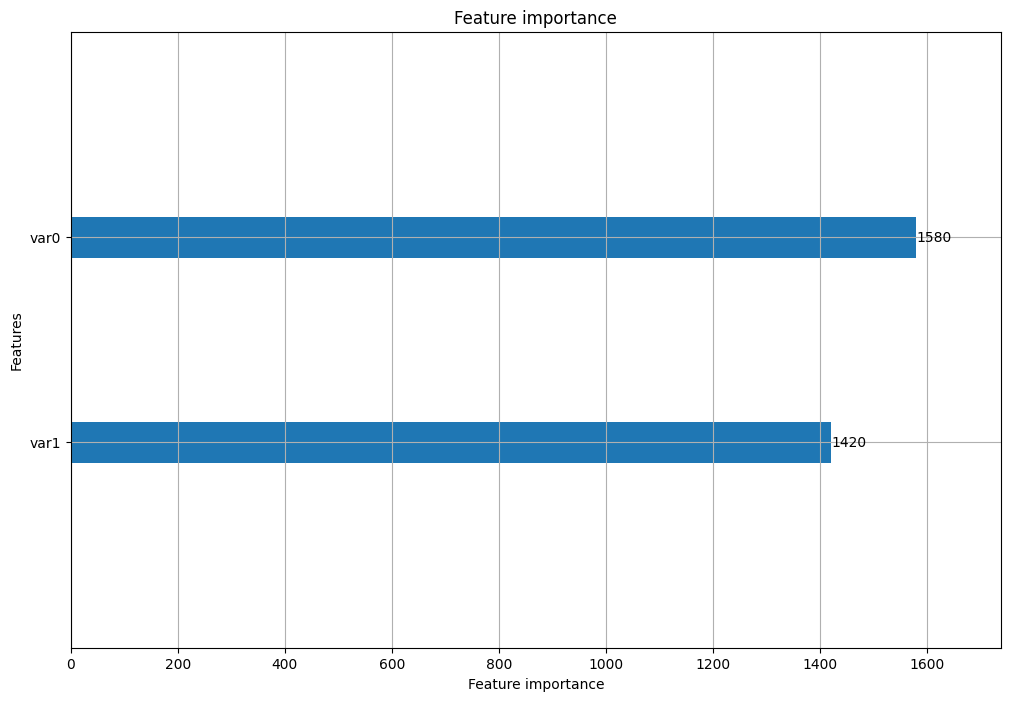

In [106]:
lightgbm.plot_importance(model, figsize = (12,8))

In [107]:
num=0

X_test = validation_df.drop(["text","query_id", "rankings"], axis=1).iloc[num*size_of_group:(num+1)*size_of_group]
y_test = validation_df["rankings"].iloc[num*size_of_group:(num+1)*size_of_group]
text_test = validation_df["text"].iloc[num*size_of_group:(num+1)*size_of_group]
qids_test = validation_df["query_id"].iloc[num*size_of_group:(num+1)*size_of_group]


test_pred = model.predict(X_test)


scores =test_pred

sorted_indices = np.argsort(scores)

ranks = np.empty(len(scores), int)
ranks[sorted_indices] = np.arange(len(scores)) + 1

test_pred_s=ranks

# map test_pred_s between 1.0 to 5.0
old_min=np.min(test_pred_s)
old_max=np.max(test_pred_s)

new_min=np.min(np.array(y_test))
new_max=np.max(np.array(y_test))

test_pred_s = ((test_pred_s - old_min) * (new_max - new_min) / (old_max - old_min) + new_min).round(2)


#create empy dataframe
df_pred = pd.DataFrame()
df_pred['text'] = np.array(text_test)
df_pred['query_id'] = np.array(qids_test)
df_pred['actual_ranking'] = np.array(y_test)
df_pred['pred_ranking'] = test_pred_s

# df_pred.sort_values("pred_ranking", ascending=False)

df_pred


,text,query_id,actual_ranking,pred_ranking
0,done (talk · contribs),248,3.0,3.89
1,I will look into what to do about this.,248,0.0,0.00
2,what was flame????? are u stupid?,248,0.0,0.56
3,My RfA \n\nThanks for your support. -,248,2.0,2.78
4,KISS MY DICK \n\n...ALL 3 OF YOU,248,0.0,1.11
5,How is this racist? 86.182.174.123,248,4.0,5.00
6,Shut the !@#$%^&* up!,248,5.0,3.33
7,mezo mezo is bastard,248,3.0,2.22
8,test \n\nAre you here?,248,0.0,1.67
9,Thank you; I will.,248,2.0,4.44
